In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./bank.csv")

In [37]:
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [42]:
columnas_a_usar= ["age", "balance", "day", "duration", #numericas
                  "job", "marital", "education", "contact", #categoricas
                  "deposit"] #variable a predecir

data_actualizado = data[columnas_a_usar]

#convertir la columna a predecir en binaria (numerica)
data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

data[columnas_a_usar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   balance    11162 non-null  int64 
 2   day        11162 non-null  int64 
 3   duration   11162 non-null  int64 
 4   job        11162 non-null  object
 5   marital    11162 non-null  object
 6   education  11162 non-null  object
 7   contact    11162 non-null  object
 8   deposit    11162 non-null  object
dtypes: int64(4), object(5)
memory usage: 785.0+ KB


C:\Users\48242293\AppData\Local\Temp\ipykernel_14660\4207855164.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [43]:
data_actualizado

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,1
1,56,45,5,1467,admin.,married,secondary,unknown,1
2,41,1270,5,1389,technician,married,secondary,unknown,1
3,55,2476,5,579,services,married,secondary,unknown,1
4,54,184,5,673,admin.,married,tertiary,unknown,1
...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,blue-collar,single,primary,cellular,0
11158,39,733,16,83,services,married,secondary,unknown,0
11159,32,29,19,156,technician,single,secondary,cellular,0
11160,43,0,8,9,technician,married,secondary,cellular,0


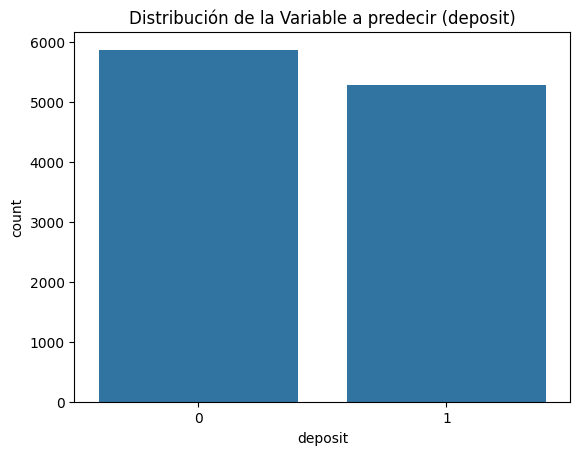

In [44]:
# Distribución de las variables numéricas
data_actualizado[["age", "balance", "day", "duration"]].describe()

# Distribución de la variable deposit
sns.countplot(x='deposit', data=data_actualizado)
plt.title("Distribución de la Variable a predecir (deposit)")
plt.show()



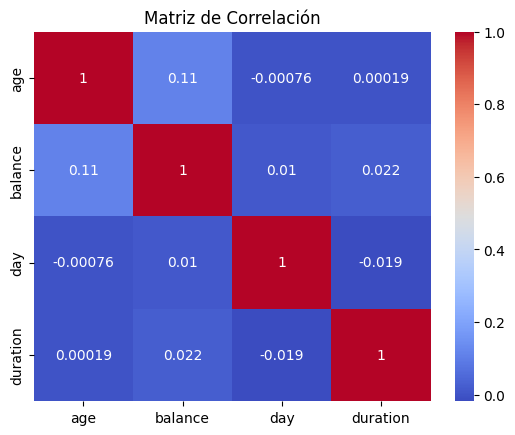

In [46]:
# Matriz de correlación de las variables numéricas 
matriz_de_correlacion = data_actualizado[["age", "balance", "day", "duration"]].corr() 
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm') 
plt.title("Matriz de Correlación") 
plt.show()